In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy import stats

#Reading the file

my_data = genfromtxt('dataset1.csv', delimiter=',', skip_header=1)
print(my_data)

#Printing the properties

print(my_data.shape) #Rows and columns

#print(my_data[:,1])
print(my_data.dtype) #datatype of mumpy array
intdata= my_data.astype(int) #converting into integer
print(intdata.dtype)
print(np.transpose(my_data).shape) #Size of the transpose of the matrix



[[2. 2. 4. ... 2. 1. 1.]
 [4. 4. 4. ... 2. 2. 1.]
 [2. 2. 2. ... 2. 2. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 3. 1. 0.]
 [0. 0. 0. ... 3. 1. 0.]]
(170, 55)
float64
int32
(55, 170)


In [2]:
#Plotting the graph

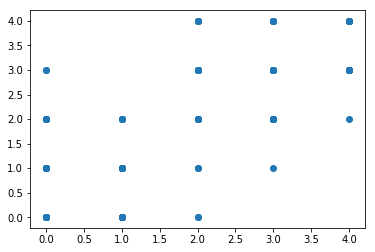

In [3]:
x= my_data[:,1]
#print(x.shape)
y= my_data[:,2]
#print(y.shape)
#print(x,y)
plt.scatter(x,y)
plt.show()


In [4]:
#Linear regression

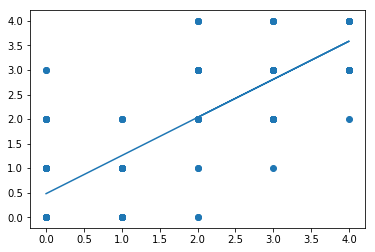

In [5]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
    return slope*x + intercept
mymodel = list(map(myfunc, x)) #Run each value of the x array through the function. This will result in a new array with new values for the y-axis

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [6]:
#import pickle5 as pickle
from sklearn.externals import joblib 

joblib.dump(my_data, 'pickled.pkl') 
pickled_data = joblib.load('pickled.pkl')
print(pickled_data)


[[2. 2. 4. ... 2. 1. 1.]
 [4. 4. 4. ... 2. 2. 1.]
 [2. 2. 2. ... 2. 2. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 3. 1. 0.]
 [0. 0. 0. ... 3. 1. 0.]]


In [7]:
#working with dicom files

In [17]:
import pydicom as dicom
from PIL import Image 
import matplotlib.pylab as plt
import numpy as np

ds = dicom.read_file('0002.DCM')

print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 150
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: X-Ray Angiographic Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 999.999
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
(0008, 0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0008, 0020) Study Date                          DA: '19941013'
(0008, 0030) Study Time                          TM: '141917'
(0008, 0050) Accession Number         

(1280, 590, 3)


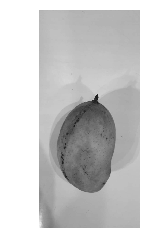

In [9]:
import numpy as np
import matplotlib.pylab as plt

#%matplotlib inline

im = plt.imread("mango.JPEG")
print(im.shape)
plt.axis("off")

#Plotting Image

plt.imshow(im)

# converting to greyscales

rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(im[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

In [10]:
import sys
!{sys.executable} -m pip install opencv-python

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [14]:
import sys
!{sys.executable} -m pip install pydicom

  Using cached https://files.pythonhosted.org/packages/d3/56/342e1f8ce5afe63bf65c23d0b2c1cd5a05600caad1c211c39725d3a4cc56/pydicom-2.0.0-py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-wbmte9m7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


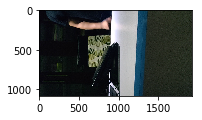

In [7]:
import cv2
import math
import matplotlib as plt
import matplotlib.pyplot as plt

count = 0
videoFile = "VID_2.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
def grab_frame(cap):
    ret,frame = cap.read()
    return cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)



#create two subplots
ax1 = plt.subplot(1,2,1)


#create two image plots
im1 = ax1.imshow(grab_frame(cap))


plt.ion()

while True:
    im1.set_data(grab_frame(cap))
   
    #plt.pause(0.2)

plt.ioff() # due to infinite loop, this gets never called.
plt.show()



1920.0 * 1080.0
1920.0 * 1080.0
1920.0 * 1080.0
1920.0 * 1080.0
1920.0 * 1080.0
1920.0 * 1080.0
Done!


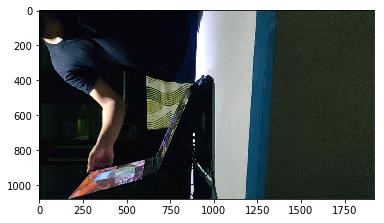

In [25]:
count = 0
videoFile = "VID_2.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    
    

    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
        print(cap.get(3),'*',cap.get(4))
cap.release()
print ("Done!")


img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)


In [20]:
#converting to greyscale
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2=plt.imread('img.jpg')

plt.imshow(img2,cmap=plt.get_cmap("gray"))


FileNotFoundError: [Errno 2] No such file or directory: 'img.jpg'